In [1]:
# Pandas is used for data manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

2023-08-21 12:55:36.061498: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


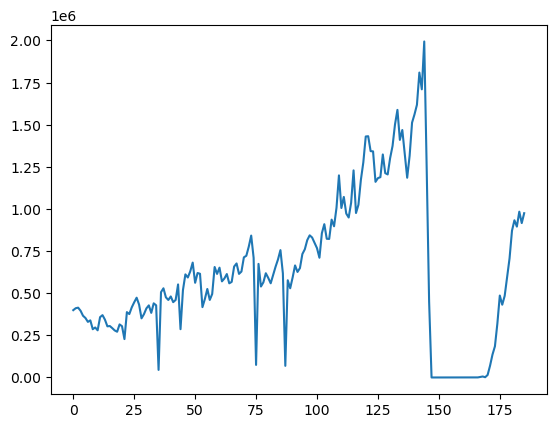

In [2]:
# Read in data and display fist 5 rows
df = pd.read_csv('TIME SERIES + ECONOMIC INDEX - DATA COMPOSITION 2 (80-10-10).csv')
df1 = df.drop(['Class'], axis=1)
df1 = df1['Tourist Arrival']
df1 = np.array(df1).reshape(-1,1)
df1
plt.plot(df1)

In [3]:
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(df1)
df1.min()

0.0

In [4]:
train_size = 148
validation_size = 19
test_size = 19

In [5]:
train = df1[0:148, :]
train.shape

(148, 1)

In [6]:
validation = df1[148:167, :]
validation.shape

(19, 1)

In [7]:
test = df1[167:186, :]
test.shape

(19, 1)

In [8]:
def get_data(df1, look_back):
    dataX, dataY = [], []
    for i in range (len(df1)-look_back-1):
        a = df1[i:(i+look_back),0]
        dataX.append(a)
        dataY.append(df1[i+look_back, 0])
    return np.array(dataX), np.array(dataY)

In [9]:
look_back = 1
x_train, y_train = get_data(train, look_back)

In [10]:
x_test, y_test = get_data(test, look_back)

In [11]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [12]:
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(LSTM(24, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer =Adam(learning_rate=0.0005))
history = model.fit(x_train, y_train, epochs=50, batch_size=1)
model.summary()

2023-08-21 12:55:41.180847: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/50
146/146 [==============================] - 3s 3ms/step - loss: 0.1054
Epoch 2/50
146/146 [==============================] - 0s 2ms/step - loss: 0.0358
Epoch 3/50
146/146 [==============================] - 0s 3ms/step - loss: 0.0230
Epoch 4/50
146/146 [==============================] - 1s 4ms/step - loss: 0.0205
Epoch 5/50
146/146 [==============================] - 0s 3ms/step - loss: 0.0183
Epoch 6/50
146/146 [==============================] - 0s 2ms/step - loss: 0.0164
Epoch 7/50
146/146 [==============================] - 1s 8ms/step - loss: 0.0146
Epoch 8/50
146/146 [==============================] - 1s 4ms/step - loss: 0.0131
Epoch 9/50
146/146 [==============================] - 1s 4ms/step - loss: 0.0118
Epoch 10/50
146/146 [==============================] - 0s 3ms/step - loss: 0.0106
Epoch 11/50
146/146 [==============================] - 0s 3ms/step - loss: 0.0094
Epoch 12/50
146/146 [==============================] - 0s 2ms/step - loss: 0.0087
Epoch 13/50
146/146 [====

In [13]:
y_pred = model.predict(x_test)

1/1 [==============================] - 1s 1s/step


In [14]:
scaler.scale_

array([5.01473077e-07])

In [15]:
y_pred = scaler.inverse_transform(y_pred)

In [16]:
y_test = np.array(y_test)
y_test = y_test.reshape(-1,1)
y_test = scaler.inverse_transform(y_test)

In [17]:
from math import sqrt
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_absolute_percentage_error

In [18]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", RMSE)

Root Mean Squared Error: 87403.50332479384


In [19]:
MAE = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", MAE)

Mean Absolute Error: 78728.7247242647


In [20]:
MAPE = mean_absolute_percentage_error(y_test, y_pred)
print("Mean Absolute Percentage Error:", MAPE)

Mean Absolute Percentage Error: 6.589819393576676


In [21]:
def SMAPE(y_test,y_pred):
    return 100/len(y_test) * np.sum(2 * np.abs(y_pred - y_test) / (np.abs(y_test) + np.abs(y_pred)))
result = SMAPE(y_test,y_pred)
print("SMAPE :", result)

SMAPE : 46.10180735225007


In [22]:
def RMSPE(y_test, y_pred):
    return np.sqrt(np.nanmean(np.square(((y_test - y_pred) / y_test))))*100
result1 = RMSPE(y_test,y_pred)
print("RMSPE :", result1)

RMSPE : 2040.3420402151307


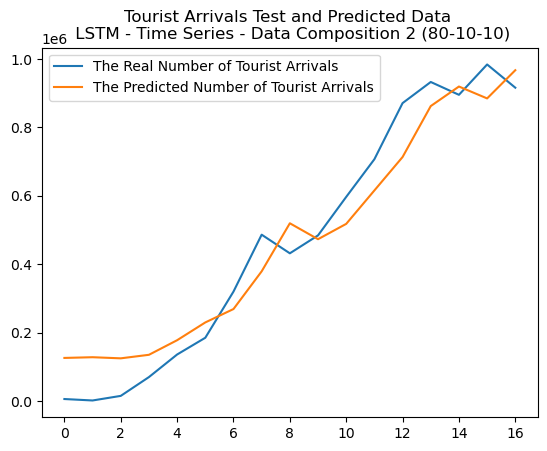

In [23]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="The Real Number of Tourist Arrivals")
plt.plot(x_ax, y_pred, label="The Predicted Number of Tourist Arrivals")
plt.title("Tourist Arrivals Test and Predicted Data \n LSTM - Time Series - Data Composition 2 (80-10-10)")
plt.legend()
plt.show()